## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
mouse_metadata_df
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(study_results_df, mouse_metadata_df, how ="left", on="Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Check the number of mice.
number_mice = combined_df["Mouse ID"].nunique()
number_mice

249

In [3]:
# Find any duplicate rows with the same Mouse ID's and Timepoints. 
duplicate_mouse_id = combined_df.loc[combined_df.duplicated(subset=["Mouse ID", "Timepoint"], keep="first")]

duplicate_mouse_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Drop any duplicate rows
clean_data = combined_df.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="first")
clean_data  


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [5]:
# Recheck the number of mice
check_df = clean_data["Mouse ID"].nunique()
check_df

249

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen.

mean = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
mean 
median = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
median
variance = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
variance
std_deviation = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
std_deviation
SEM = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
SEM

Summary_df = pd.DataFrame({"Mean Tumor Volume" :mean,
                           "Median Tumor Volume" : median,
                           "Variance Tumor Volume" : variance,
                           "Standard Deviation Tumor Volume" : std_deviation,
                           "SEM Tumor Volume" : SEM})

Summary_df

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of unique mice tested')

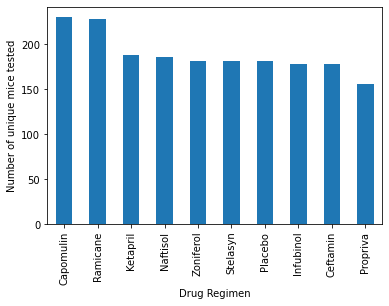

In [25]:
# Generate a bar plot showing the total number of datapoints for each drug regimen using pandas.
# There should be a single bar per regimen
mice_count = clean_data["Drug Regimen"].value_counts()
mice_count.plot(kind='bar', align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of unique mice tested")

Text(0, 0.5, 'Number of unique mice tested')

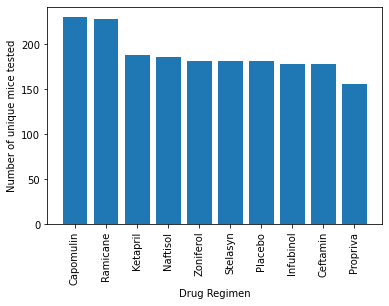

In [26]:
# General identical bar plot using pyplot instead of pandas.
mice_count = clean_data["Drug Regimen"].value_counts()
mice_count
plt.bar(mice_count.index.values,mice_count.values)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of unique mice tested")


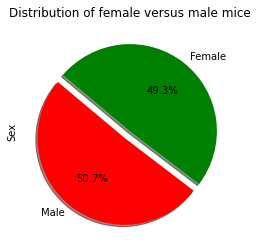

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_distribution = clean_data["Sex"].value_counts()
sex_distribution
colors = ["red", "green"]
explode = (0.1,0)

sex_distribution.plot(kind="pie",colors=colors,explode=explode,autopct="%1.1f%%",shadow=True, startangle=140)
plt.title("Distribution of female versus male mice")
plt.show()

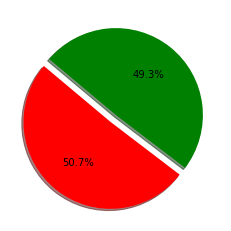

In [10]:
# Generate identical pie plot using pyplot

sex_distribution = clean_data["Sex"].value_counts()
sex_distribution
colors = ["red", "green"]
explode = (0.1,0)
plt.pie(sex_distribution,explode=explode,colors=colors,
        autopct="%1.1f%%",shadow=True, startangle=140)
plt.show()

## Quartiles, Outliers and Boxplots

In [11]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# HINT: Not all mice lived until timepoint 45
# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = clean_data.groupby("Mouse ID")["Timepoint"].max()
greatest_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

max_tumor_volume = pd.merge(greatest_timepoint,clean_data, on=["Mouse ID","Timepoint"], how="left")
max_tumor_volume.set_index("Mouse ID")

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
a203,45,67.973419,2,Infubinol,Female,20,23
a251,45,65.525743,1,Infubinol,Female,21,25
a262,45,70.717621,4,Placebo,Female,17,29
a275,45,62.999356,3,Ceftamin,Female,20,28
a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...
z435,10,48.710661,0,Propriva,Female,12,26
z578,45,30.638696,0,Ramicane,Male,11,16
z581,45,62.754451,3,Infubinol,Female,24,25


In [12]:
#Put treatments into a list for for loop (and later for plot labels)
treatment_regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

#Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

for drug in treatment_regimen:
    
    final_tumor_volume = max_tumor_volume.loc[max_tumor_volume["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
     
    # add subset 
    tumor_volume.append(final_tumor_volume)
    
# Calculate quartiles, IQR, and identify potential outliers for each regimen.    
    quartiles = final_tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    
# Determine outliers using upper and lower bounds
    upper_bound = upperq + (1.5*iqr)
    lower_bound = lowerq - (1.5*iqr)
    outliers = final_tumor_volume.loc[(final_tumor_volume < lower_bound)|(final_tumor_volume > upper_bound)]
    outliers
    print(f"{drug}'s potential outliers : {outliers}")
        

print(f"The lower quartile of Tumor volume is: {lowerq}")
print(f"The upper quartile of Tumor volume is : {upperq}")
print(f"The median of Tumor volume is : {quartiles[0.5]}")
print(f"The interquartile range of Tumor volume is : {iqr}")

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


Capomulin's potential outliers : Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers : Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers : 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers : Series([], Name: Tumor Volume (mm3), dtype: float64)
The lower quartile of Tumor volume is: 48.72207785
The upper quartile of Tumor volume is : 64.29983003
The median of Tumor volume is : 59.85195552
The interquartile range of Tumor volume is : 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

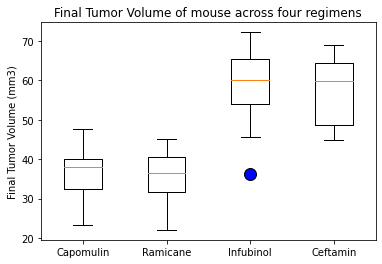

In [24]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# There should be a single chart with four box plots inside it.

colour_out = dict(markerfacecolor= 'blue', markersize=12)
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume of mouse across four regimens')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_volume, labels= treatment_regimen, flierprops=colour_out)
plt.show()



## Line and Scatter Plots

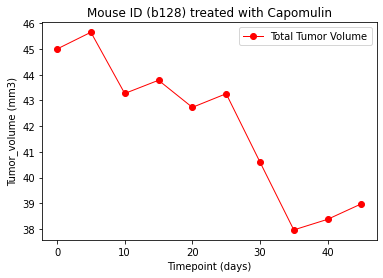

In [14]:
# Generate a line plot of tumor volume vs. time point for a single mouse 
# treated with Capomulin
    
canpoulin_data = clean_data.loc[clean_data["Drug Regimen"] ==  "Capomulin"]                             
canpoulin_data
mouse_data = canpoulin_data.loc[canpoulin_data["Mouse ID"] == "b128"]
mouse_data

x_axis_data = mouse_data["Timepoint"] 
points = mouse_data["Tumor Volume (mm3)"]
final_plot, =plt.plot(x_axis_data,points, marker="o",color="red", linewidth=1, label="Total Tumor Volume")
plt.legend(handles=[final_plot], loc="best")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor_volume (mm3)")
plt.title("Mouse ID (b128) treated with Capomulin")
plt.show()

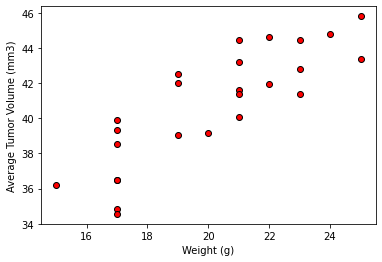

In [15]:
# Generate a scatter plot of average tumor volume vs. mouse weight 
# for all mice in the Capomulin regimen
canpoulin_data = clean_data.loc[clean_data["Drug Regimen"] ==  "Capomulin"]                             
canpoulin_data


avg_tumor_vol = canpoulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
avg_tumor_vol

weight = canpoulin_data.groupby("Mouse ID")["Weight (g)"].mean()
weight

plt.scatter(weight, avg_tumor_vol, marker="o", facecolors="red", edgecolors="black")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between Mouse weight and Average tumor volume is 0.84


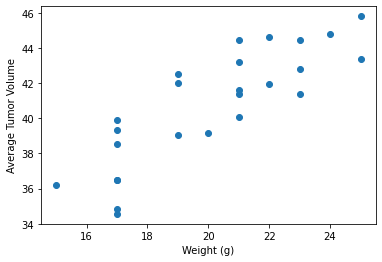

In [16]:
# Calculate the correlation coefficient

avg_tumor_vol = canpoulin_data.groupby(["Mouse ID"]).mean()
avg_tumor_vol

mouse_weight = avg_tumor_vol["Weight (g)"]
average_tumor_vol = avg_tumor_vol["Tumor Volume (mm3)"]

correlation = st.pearsonr(mouse_weight,average_tumor_vol)

plt.scatter(mouse_weight,average_tumor_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume")
print(f"The correlation between Mouse weight and Average tumor volume is {round(correlation[0],2)}")
plt.show()


The r-squared value is: 0.7088568047708717)


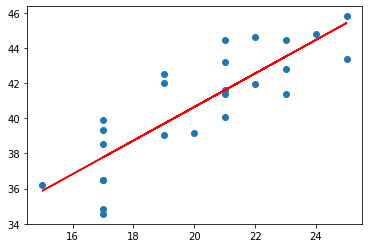

In [20]:
# Calculate linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = avg_tumor_vol["Weight (g)"]
y_values = avg_tumor_vol["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
print(f"The r-squared value is: {rvalue**2})")
plt.show()

# Observations and Insights